# Exploratory Data Analysis BPJS Kesehatan FAQ

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

### Load Dataset

In [2]:
df = pd.read_csv('final_dataset_clean.csv')
df

,category,subcategory,question,answer
0,UMUM,PENGERTIAN UMUM,Apa itu BPJS Ketenagakerjaan?,BPJS Ketenagakerjaan adalah badan hukum yang d...
1,UMUM,PENGERTIAN UMUM,Apa saja program BPJS Ketenagakerjaan?,Program yang diselenggarakan oleh BPJS Ketenag...
2,UMUM,PENGERTIAN UMUM,Siapakah yang dimaksud peserta BPJS Ketenagake...,Program yang diselenggarakan oleh BPJS Ketenag...
3,UMUM,PENGERTIAN UMUM,Berapa iuran yang harus dibayarkan oleh pesert...,Iuran untuk Pekerja Formal atau Penerima Upah ...
4,UMUM,PENGERTIAN UMUM,Apa sajakah formulir yang wajib diisi pemberi ...,Pemberi kerja yang akan mendaftarkan dirinya d...
...,...,...,...,...
1070,KEPESERTAAN,Pendaftaran Badan Usaha,Apa syarat pendaftaran Perusahaan Asing,Syarat Pendaftaran antara lain NIBMOUPKS denga...
1071,KEPESERTAAN,Pendaftaran Umum,Apa syarat pendaftaran LSM Asing,Syarat Pendaftaran antara lain NIBMOUPKS denga...
1072,KEPESERTAAN,Pendaftaran Peserta Khusus,Apa syarat pendaftaran Peserta Pensiun Polri,Pendaftaran dapat dilakukan secara perorangan ...
1073,KEPESERTAAN,Pendaftaran Umum,Apa syarat pendaftaran Perintis Kemerdekaan,Pendaftaran dapat dilakukan secara perorangan ...


## Analyst Process

Langkah awal sebelum melakukan analisa data adalah menambahkan kolom baru berupa perhitungan dari jumlah kata atau karakter pada kolom question dan answer untuk analisa setiap kata lebih lanjut.

In [3]:
df['question_len_word'] = df['question'].apply(len)
df['answer_len_word'] = df['answer'].apply(len)

### 1. Basic Informasi Dataset

In [4]:
print('Basic Dataset Information:')
print(df.info())
print('\nShape of dataset:', df.shape)
print('\nUnique Value in Column:')
print(df.nunique())

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           1075 non-null   object
 1   subcategory        1075 non-null   object
 2   question           1075 non-null   object
 3   answer             1075 non-null   object
 4   question_len_word  1075 non-null   int64 
 5   answer_len_word    1075 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 50.5+ KB
None

Shape of dataset: (1075, 6)

Unique Value in Column:
category               26
subcategory            79
question             1064
answer               1056
question_len_word     180
answer_len_word       540
dtype: int64


### Informasi Dasar Dataset
Dari informasi dataset, didapati bahwa:
- Dataset terdiri dari 1075 baris dan 6 kolom
- Setiap kolom tidak memiliki missing value
- Tipe data pada dataset terbagi antara object (4 kolom) dan integer (2 kolom)
- Dataset memiliki nilai uniq pada setiap kolom hal ini dapat menunjukan bahwa data memiliki variasi yang banyak variasi dan keragaman data
- question_len_word: ada 180 nilai unik, ini mengindikasikan panjang kata dalam kolom answer bervariasi
- answer_len_word: ada 540 nilai unik, menunjukkan distribusi yang lebih bervariasi pada panjang kata di kolom answer dibandingkan kolom question

Banyak subkategori (79) dibanding kategori utama (26). Struktur data cukup detail dan bisa digunakan untuk analisis granular atau model klasifikasi multi-kelas/subkelas


### 2. Basic Dataset Analyst

In [5]:
print("\nText Statistics for Questions:")
print(df['question_len_word'].describe())
print("\nText Statistics for Answers:")
print(df['answer_len_word'].describe())


Text Statistics for Questions:
count    1075.000000
mean       80.623256
std        44.229662
min        13.000000
25%        51.000000
50%        70.000000
75%        99.000000
max       517.000000
Name: question_len_word, dtype: float64

Text Statistics for Answers:
count    1075.000000
mean      372.919070
std       458.042038
min         6.000000
25%       158.000000
50%       255.000000
75%       430.000000
max      7172.000000
Name: answer_len_word, dtype: float64


Hasil statistik deskriptif terhadap panjang kata pada kolom question_len_word dan answer_len_word sebagai berikut:
- untuk question, nilai rata-rata panjang kata adalah sekitar 80, dengan standar deviasi sekitar 44, dan median sebesar 70 kata. Hal ini menandakan sebagian besar pertanyaan memiliki panjang sedang dengan sedikit variasi, meskipun ada beberapa pertanyaan yang sangat panjang (mencapai hingga 517 kata) yang bisa dianggap sebagai outlier. Nilai minimum 13 kata menunjukkan pertanyaan cukup penting. 

- untuk answer, nilai rata-rata jauh lebih tinggi sekitar 373 kata dengan variasi yang sangat besar, yaitu standar deviasi 458. Median 255 kata juga lebih kecil dari rata-rata, menunjukkan distribusi jawaban miring ke kanan (right skewed) dengan adanya jawaban-jawaban yang sangat panjang hingga 7.172 kata sebagai outlier ekstrim, dan jawaban sangat singkat 6 kata sebagai batas minimum.

Analisa lebih lanjut dapat memasukkan visualisasi distribusi panjang teks (boxplot, histogram) untuk memahami proporsi outlier.

### 3. Panjang Distribusi Karakter (Question dan Answer)

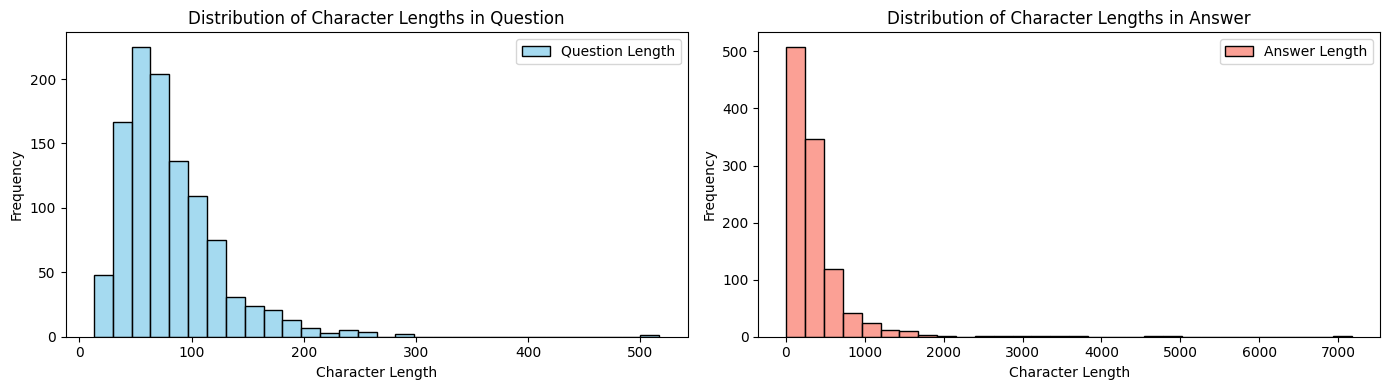

In [6]:
# Membuat Plot Berdasarkan Panjang kalimat dari setiap question dan answer
# Membuat figure dengan 2 subplot (1 untuk question, 1 untuk answer)
plt.figure(figsize=(14, 4))

# Plot Question
plt.subplot(1, 2, 1)
sns.histplot(df['question_len_word'], bins=30, color='skyblue', label='Question Length')
plt.legend()
plt.title('Distribution of Character Lengths in Question')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

# Plot answer
plt.subplot(1, 2, 2)
sns.histplot(df['answer_len_word'], bins=30, color='salmon', label='Answer Length')
plt.legend()
plt.title('Distribution of Character Lengths in Answer')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Berikut adalah analisa detail dari histogram distribusi panjang karakter di kolom question dan answer:
- Pada histogram panjang karakter pada kolom question, distribusi miring ke kanan (right skewed). Sebagian besar pertanyaan berada di rentang panjang karakter sekitar 20 hingga 150 dengan frekuensi tertinggi berada di sekitar 60-90 karakter. Distribusi menunjukkan kekonsistenan dari per kata. Terdapat 500 karakter pada suatu pertanyaan, yang dapat dianggap sebagai outlier. Panjang teks pertanyaan pada dataset ini masih tergolong cukup wajar.

- pada histogram panjang karakter answer, distribusinya juga sangat miring ke kanan dengan puncak frekuensi di rentang karakter yang jauh lebih kecil. Meskipun mayoritas jawaban memiliki panjang yang relatif singkat sampai sedang, ada terdapat jawaban yang sangat panjang, mencapai lebih dari 7.000 karakter. Menunjukan adanya data yang panjang dari jawaban di dataset. Distribusi dari jawaban cenderung umum dalam data teks bergantung konteks dan kebutuhan penjelasan dari suatu pertanyaan

### 4. Panjang Distribusi Karakter (Question dan Answer) berdasarkan Subcategory

In [7]:
# AVG karakter dari Question berdasarkan Subcategory
question_subcat = df.groupby('subcategory')['question_len_word'].mean().reset_index()

# Mengurutkan descending order
question_subcat = question_subcat.sort_values('question_len_word', ascending=True)

In [8]:
# AVG karakter dari Question berdasarkan Subcategory
answer_subcat = df.groupby('subcategory')['answer_len_word'].mean().reset_index()

# Mengurutkan descending order
answer_subcat = answer_subcat.sort_values('answer_len_word', ascending=True)

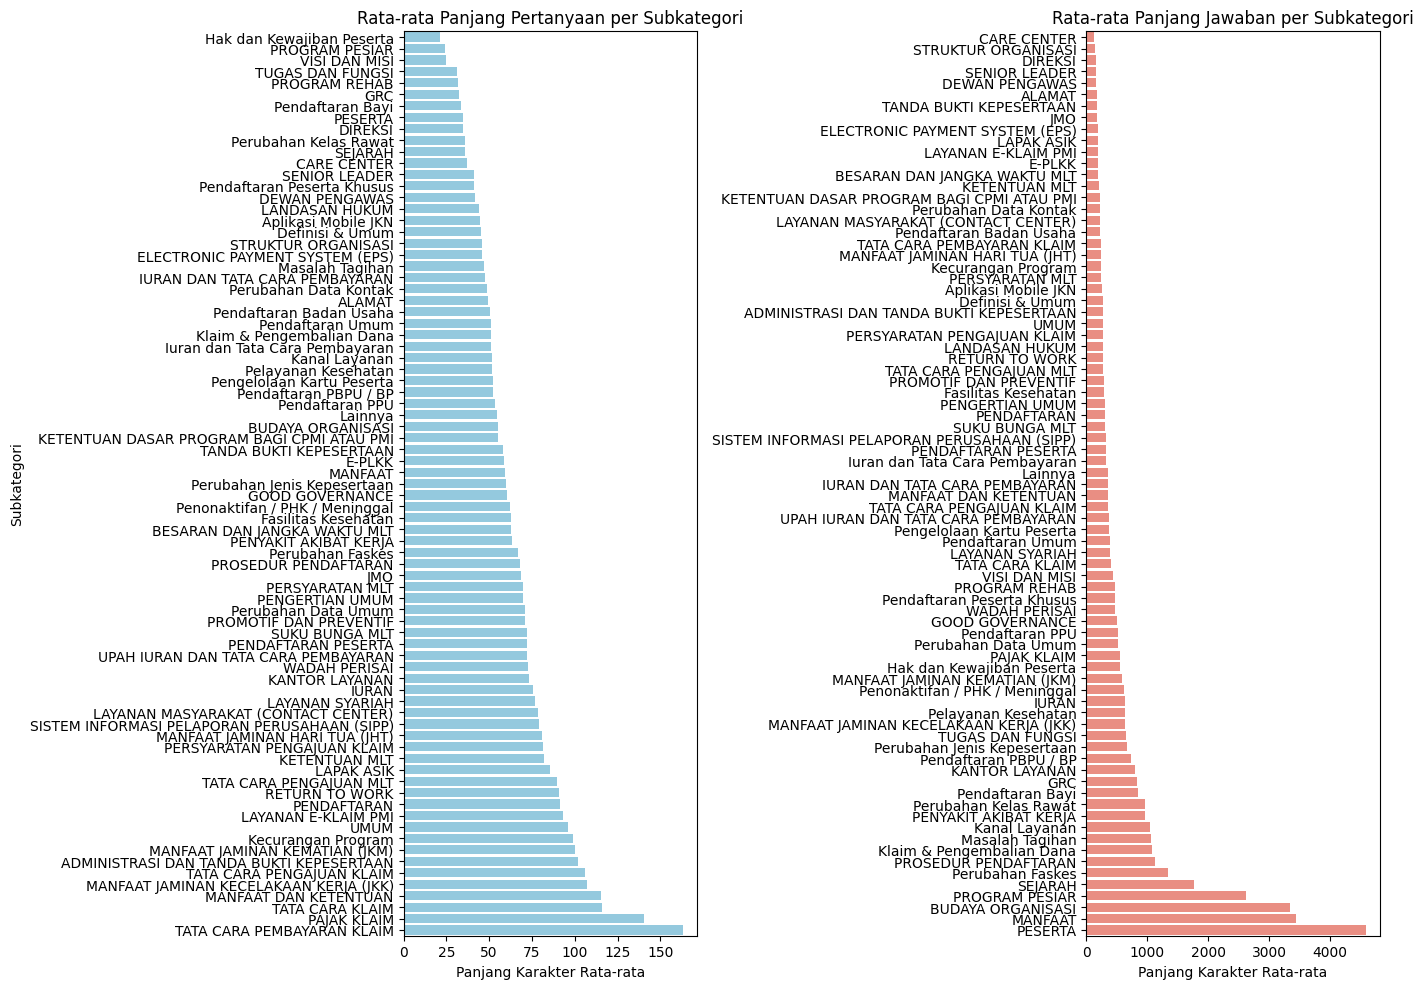

In [9]:
# Membuat Plot 
# Membuat figure dengan 2 subplot (1 untuk question, 1 untuk answer)
plt.figure(figsize=(14, 10))

# Plot untuk panjang Question
plt.subplot(1, 2, 1)
sns.barplot(data=question_subcat, x='question_len_word', y='subcategory', color='skyblue')
plt.title('Rata-rata Panjang Pertanyaan per Subkategori')
plt.xlabel('Panjang Karakter Rata-rata')
plt.ylabel('Subkategori')

# Plot untuk panjang answer
plt.subplot(1, 2, 2)
sns.barplot(data=answer_subcat, x='answer_len_word', y='subcategory', color='salmon')
plt.title('Rata-rata Panjang Jawaban per Subkategori')
plt.xlabel('Panjang Karakter Rata-rata')
plt.ylabel('')

plt.tight_layout()
plt.show()

Berikut adalah analisa detail berdasarkan visualisasi rata-rata panjang karakter rhadap subcategory:
- pada grafik rata-rata panjang pertanyaan per subkategori (pada bagian kiri), terlihat bahwa panjang pertanyaan relatif bervariasi antar subkategori, dengan rentang rata-rata mulai dari sekitar 10 hingga lebih dari 150 karakter. Subkategori seperti "TATA CARA PEMBAYARAN KLAIM", "PAJAK KLAIM", dan "TATA CARA KLAIM" memiliki panjang rata-rata pertanyaan yang paling tinggi, menunjukkan bahwa pertanyaan di kategori tersebut cenderung lebih panjang dan mungkin membutuhkan penjelasan yang lebih rinci atau konteks yang lebih kompleks. Sebaliknya, subkategori seperti "Hak dan Kewajiban Peserta" dan "PROGRAM PESIAR" memiliki panjang pertanyaan yang lebih pendek, menunjukkan pertanyaan yang mungkin lebih sederhana atau langsung ke inti pointnya.

- pada grafik rata-rata panjang jawaban per subkategori (di bagian kanan), variasi panjang jauh lebih besar gapnya. average Jawaban pada beberapa subkategori seperti "PESERTA", "MANFAAT", dan "BUDAYA ORGANISASI" menunjukkan rata-rata panjang yang sangat besar, bahkan mencapai ribuan karakter. Menandakan subkategori memerlukan pembahasan yang sangat detail dan lengkap dalam memberikan informasi. Sementara subkategori seperti "CARE CENTER", "STRUKTUR ORGANISASI", dan "DIREKSI" memiliki averagr jawaban yang sangat sedikit atau singkat, di kisaran puluhan hingga ratusan karakter, menandakan informasi yang disampaikan lebih ringkas.

Dapat dianalisa bahwa panjang rata-rata jawaban antara subkategori menunjukan kompleksitas dan kebutuhan pembahasan yang berbeda untuk setiap topik. Contohnya, subkategori yang berhubungan dengan "manfaat" dan "peserta" cenderung memiliki jawaban panjang karena harus menjelaskan berbagai aspek yang lebih rinci, sementara subkategori administratif atau definisi lebih singkat dan langsung poin.


### 5. Kata-kata Paling Umum pada Kolom Question dan Answer

In [10]:
# Kata yang sering muncul di kolom Question dan Answer

# Kata-kata umum bahasa Indonesia yang ingin diabaikan dalam analisis (kata hubung atau tidak memiliki makna)
additional_stopwords = [
    'adalah', 'yaitu', 'tersebut', 'dapat', 'harus', 'wajib', 'sebesar', 'meliputi', 'dengan', 'untuk', 'pada', 'dari', 'yang', 'dan', 'atau',
    'apakah', 'bagaimana', 'berapa', 'kepada', 'oleh', 'sebagai', 'sesuai', 'seperti', 'dalam', 'tahun', 'bulan', 'hari', 'apabila', 'jika', 
    'maka','akan', 'telah', 'tidak', 'namun', 'iuran', 'contohnya', 'misalnya', 'antara lain', 'sebagai berikut', 'dll', 'diantaranya', 'sejak',
    'selama', 'setelah','sebelum', 'paling lama', 'paling singkat', 'terhitung', 'pertama', 'kedua', 'ketiga', 'satu', 'dua', 'tiga', 'lima',
    'sepuluh', 'seratus', 'nomor','persen', 'prosen', 'rupiah', 'Rp', 'ribu', 'juta', 'miliar', 'keterangan', 'informasi', 'data', 'berkas',
    'lampiran', 'bukti', 'dasar', 'ketentuan','apa', 'sajakah', 'jkk', 'jht', 'jp', 'jkm', 'jkp', 'pu', 'bpu', 'pkwt', 'pkwtt', 'plkk', 'spi',
    'spup', 'sipp', 'prs', 'saja', 'cara', 'bagi', 'ingin','bisa', 'atas', 'lebih', 'masih', 'mengalami', 'di', 'sudah', 'mendaaptkan', 'saat',
    'sama', 'mengetahui', 'cpmi', 'pmi', 'sipp', 'berapakah','juga', 'siapakah', 'secara', 'terdapat', 'siapa', 'kembali', 'kapan', 'ada', 'dimana',
    'akibat', 'masa', 'itu', 'tetap', 'belum', 'bagi', 'tetap', 'lain', 'bentuk', 'menjadi', 'bsu', 'melalui', 'asik', 'sebagian', 'memiliki',
    'tahap', 'mendapatkan', 'jakon', 'dibutuhkan', 'melalui', 'eps', 'dimaksud', 'mlt', 'baru', 'diberikan', 'mlt', 'milik', 'besaran', 'karena',
    'melakukan', 'ke', 'kpr', 'dilakukan', 'phk', 'maupun', 'disebabkan', 'berlaku', 'digunakan', 'antara', 'selanjutnya','pemberi', 'berhak', 'menu',
    'go', 'id', 'nama', 'hanya', 'sampai', 'berikut', 'hal', 'ini', 'pilih', 'setiap', 'kode', 'jenis', 'b', 'pak', 'c', 'menggunakan', 'memenuhi',
    'sebagaimana', 'seluruh', 'salah', 'lainnya', 'status', 'sah', 'memilih', 'terdiri', 'terkait', 'manfaat', 'sehingga', 'terkait', 'ditetapkan', 
    'merupakan', 'paling', 'lama', 'berwenang', 'pihak', 'paling', 'banyak', 'klik', 'tombol', 'baik', 'hak', 'memberikan', 'tanggal', 'kemudian',
    'puluh', 'kontrak', 'masukkan','memperoleh', 'https', 'hasil', 'ya', 'syarat', 'ditanggung', 'benar', 'kali', 'nilai', 'per', 'orang', 'pp',
    'indonesia', 'republik', 'serta', 'ratus', 'menerima', 'terkadi', 'mengisi', 'fitur', 'khusus', 'akun', 'pin', 'empat', 'bukan', 'termasuk',
    'langsung', 'saldo', 'handphone', 'pengelolahan', 'tanda', 'online', 'lalu', 'tua', 'lanjut', 'kanal', 'terlebih', 'dahulu', 'rumah', 'kasus',
    'kondisi', 'kabupaten', 'kota', 'd', 'bayi', 'masuk', 'mengikuti', 'diakses', 'e', 'jangka', 'fktp', 'minimal', 'belas', 'wadah', 'badan', 'fisik',
    'lahir', 'disediakan', 'jumlah', 'tentang', 'dibayarkan', 'login', 'perisai', 'sedangkan', 'berupa', 'dokumen', 'surat', 'file', 'aplikasi',
    'website', 'portal', 'akses', 'klaim', 'tanda tangan', 'cap', 'stempel', 'arsip', 'laporan', 'lagi', 'lagi pula', 'mungkin', 'sedang', 'kira',
    'sekitar', 'sebanyak', 'correct', 'tentu', 'beberapa', 'bila', 'bpjs kesehatan', 'menyediakan', 'berdasarkan', 'melanjutkan', 'minggu', 'jam',
    'detik', 'periode', 'sampai dengan', 'hingga', 'berlaku mulai', 'bagaimanakah', 'terkena', 'work', 'rtw', 'dijamin', 'ketika', 'maksimal', 'istri',
    'berhenti', 'tata', 'menunggak', 'kurang', 'batas', 'diperoleh', 'dilaporkan', 'semua', 'berbeda', 'bp', 'asing', 'elektronik', 'mengakses',
    'mempunyai', 'definisi', 'pengecekan', 'diikuti', 'diperbolehkan', 'non', 'diterima', 'didaftarkan', 'perlu', 'sendiri', 'caranya', 'anak',
    'berbeda', 'berkala', 'dikarenakan', 'kendala', 'bni', 'habis', 'uang', 'besar', 'mengapa', 'calon', 'suami', 'juli', 'selain', 'return', 'luar',
    'negara', 'rsjht', 'saya', 'proyek', 'tujuan', 'lupa', 'ktp', 'ii', 'piutang', 'pengambilan', 'transaksi', 'pengganti', 'biaya', 'bantuan',
    'tempat', 'sms', 'selain', 'sekaligus', 'peserta', 'ppu', 'santunan', 'npp', 'prosedur', 'segmen', 'kriteria', 'mendapat', 'diajukan', 'sistem',
    'hilang', 'terjadi', 'kesalahan', 'rate', 'kesehatan', 'tingkat', 'kesalahan', 'kredit', 'tenaga', 'kerja', 'jaminan', 'pensiun', 'pekerja',
    'usaha', 'pelayanan', 'penerima', 'upah', 'jasa', 'kartu', 'mengajukan', 'mendaftar', 'membayar', 'contact center', 'mobile', 'rekening', 'bank',
    'menambahkan', 'mengurus', 'mengubah', 'agar', 'mencapai', 'reminder', 'alamat', 'pen', 'terhadap', 'lanjutan', 'mengurangi', 'penyalur',
    'lanjutan', 'penetapan', 'dikenakan', 'wilayah', 'solusi', 'didapatkan', 'tanngan', 'adanya', 'pk', 'bu', 'migran', 'kontraknya', 'mengambil',
    'ditentukan', 'tertentu', 'ikut', 'hukum', 'buruh', 'mulai', 'kelebihan', 'manual', 'perlakuan', 'dilanjutkan', 'wna', 'orif', 'langkah', 'oss',
    'komitmen', 'koreksi', 'valid', 'rincian', 'bulannya', 'alat', 'warga', 'lintas', 'gagal', 'skema', 'dimuka', 'npht', 'berakhir', 'tautan',
    'mikro', 'diperlakukan', 'kantor', 'pump', 'merubah', 'menyebabkan', 'cek', 'missing', 'mencetak', 'ulang', 'raharja', 'pindah', 'mu', 'kah',
    'lah', 'pun', 'si', 'nya', 'form', 'persyaratan', 'lampiran', 'rs','%', 'no', 'nomor', 'melihat', 'menyerahkan', 'menerima', 'melakukan',
    'memperoleh', 'saja', 'atau', 'dan', 'tapi', 'kami', 'kamu', 'aku', 'dia', 'mereka', 'anda', 'tersebut', 'ini', 'itu', 'oleh', 'ke', 'dari',
    'untuk', 'dengan', 'selama', 'sejak', 'sampai', 'belum', 'bapak', 'ibu', 'coba', 'periksa', 'silakan', 'harap', 'mohon', 'atm', 'f1', 'f1a',
    'f2', 'f1b', 'kk1', 'kk2', 'kk3', 'blth', 'tk', 'pk/bu', 'yakni', 'oleh karena itu', 'sedemikian rupa', 'demi', 'tanpa', 'versi', 'pasal',
    'ayat', 'peraturan', 'undang-undang', 'perpres', 'permenaker','menyatakan', 'menetapkan', 'menjelaskan', 'mengacu', 'tercatat', 'terdaftar',
    'rp', 'th', 'dkk', 'cash basis', 'auto debet', 'kita', '-nya', 'berkenaan', 'demikian', 'sekali', 'perhatikan', 'perjanjian', 'kewajiban',
    'terakhir', 'premi', 'bpjs', 'ketenagakerjaan', 'tenaga', 'kerja', 'program', 'pengajuan', 'pembayaran', 'perusahaan', 'kepesertaan',
    'jaminan', 'peserta', 'pelayanan', 'pendaftaran', 'tunai', 'perubahan', 'konstruksi', 'pelaporan', 'kecelakaan', 'ahli waris',
    'fasilitas', 'jmo', 'jamsostek', 'cabang', 'dokter', 'keluarga'
]

# Untuk WordCloud menggunakan set
wordcloud_stopwords = set(STOPWORDS).union(set(additional_stopwords))

# Untuk CountVectorizer (harus menggunakan list)
vectorizer_stopwords = list(STOPWORDS) + additional_stopwords



In [11]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         stopwords=wordcloud_stopwords, colormap='viridis').generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()


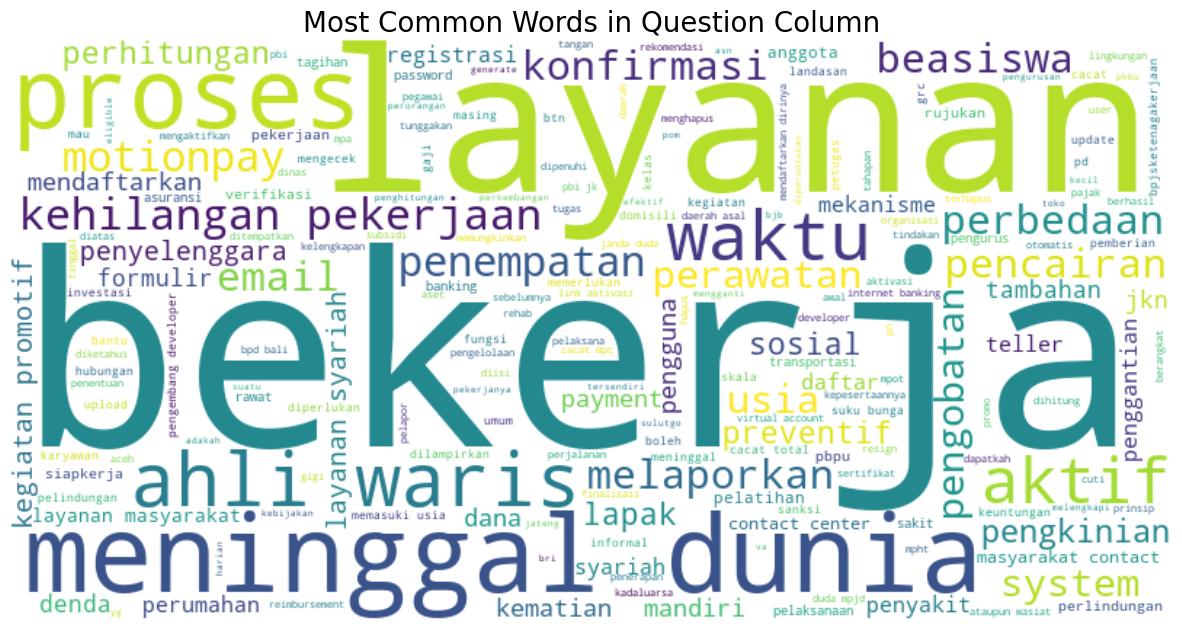

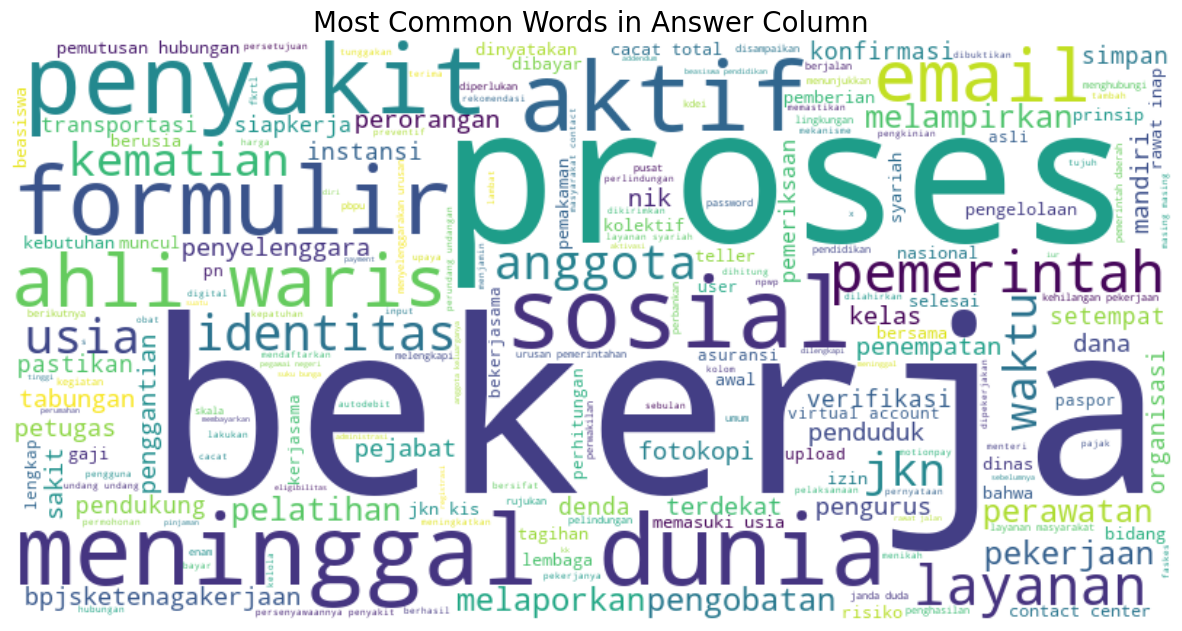


Top 10 most common words in question column:
[('layanan', 53), ('bekerja', 37), ('meninggal', 29), ('dunia', 25), ('ahli', 21), ('pekerjaan', 21), ('proses', 21), ('waris', 21), ('syariah', 19), ('waktu', 18)]

Top 10 most common words in answer column:
[('000', 222), ('bekerja', 159), ('layanan', 130), ('proses', 108), ('meninggal', 104), ('penyakit', 101), ('formulir', 98), ('pemerintah', 94), ('sosial', 94), ('00', 90)]


c:\Users\asus\anaconda3\envs\h8_env\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahli', 'aren', 'auto', 'basis', 'cash', 'center', 'contact', 'couldn', 'debet', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 'pula', 're', 'rupa', 'sedemikian', 'shan', 'shouldn', 'singkat', 'tangan', 'undang', 've', 'waris', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [12]:
# Questions
all_questions = ' '.join(df['question'].dropna().values).lower()
plot_wordcloud(all_questions, 'Most Common Words in Question Column')

# Answers
all_answers = ' '.join(df['answer'].dropna().values).lower()
plot_wordcloud(all_answers, 'Most Common Words in Answer Column')

# Vectorize dengan stopwords untuk questions
vectorizer_q = CountVectorizer(stop_words=vectorizer_stopwords)
hasil_q = vectorizer_q.fit_transform(df['question'].dropna())
word_counts_q = np.array(hasil_q.sum(axis=0)).flatten()
words_q = vectorizer_q.get_feature_names_out()
common_words_q = sorted(zip(words_q, word_counts_q), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most common words in question column:")
print(common_words_q)

# Vectorize dengan stopwords untuk answers
vectorizer_a = CountVectorizer(stop_words=vectorizer_stopwords)
hasil_a = vectorizer_a.fit_transform(df['answer'].dropna())
word_counts_a = np.array(hasil_a.sum(axis=0)).flatten()
words_a = vectorizer_a.get_feature_names_out()
common_words_a = sorted(zip(words_a, word_counts_a), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most common words in answer column:")
print(common_words_a)

Pada kolom Question, kata-kata paling sering muncul seperti "layanan" (53 kali), "bekerja" (37 kali), "meninggal" (29 kali), "dunia" (25 kali), "ahli" (21 kali), "pekerjaan" (21 kali), "proses" (21 kali), "waris" (21 kali), "syariah" (19 kali), dan "waktu" (18 kali) sesuai dengan kriteria pada wordcloud dataset yang menonjolkan fokus pada layanan BPJS, keadaan ari user seperti meninggal dunia dan kondisi menjadi ahli waris, proses administrasi, serta aspek kepesertaan dan pekerjaan. menunjukan pertanyaan mengenai pelayanan dan kebutuhan akan bpjs baik Kesehatan maupun dana penarikan dari ketenagakerjaan.

Pada kolom Answer, kata-kata yang paling sering muncul adalah "bekerja" (159 kali), "layanan" (130 kali), "proses" (108 kali), "meninggal" (104 kali), "penyakit" (101 kali), "formulir" (98 kali), "pemerintah" (94 kali), dan "sosial" (94 kali) yang menguatkan tema layanan administratif dan klaim BPJS yang melibatkan aspek teknis seperti pengisian formulir, peraturan pemerintah, dan kondisi peserta (meninggal dan penyakit).

Dapat disimpulkan bahwa baik top words maupun wordcloud menunjukkan bahwa dataset sangat terfokus pada proses layanan BPJS ketenagakerjaan, termasuk aspek kepesertaan, klaim meninggal dunia, kecelakaan, penyakit, serta administrasi yang melibatkan formulir dan verifikasi data.

## KESIMPULAN

Berdasarkan analisis dataset yang terdiri dari 1075 baris dan 6 kolom, dapat disimpulkan bahwa:
- Dataset tidak memiliki missing value, dengan kolom yang berisi variasi data sangat banyak.
- Panjang karakter dalam kolom question bervariasi, dengan nilai rata-rata sekitar 80 kata, standar deviasi 44, dan median 70. Beberapa pertanyaan sangat panjang hingga 517 kata, berpotensi outlier.
- panjang jawaban bervariasi, dengan rata-rata 373 kata, standar deviasi 458, dan median 255. Answer memiliki distribusi yang skewed ke kanan, dengan beberapa jawaban sangat panjang (hingga 7.172 kata).
- Dari hasil visualisasi, subkategori dengan pertanyaan panjang cenderung memiliki topik yang lebih kompleks, seperti "TATA CARA PEMBAYARAN KLAIM" dan "TATA CARA KLAIM",  sedangkan subkategori administratif memiliki pertanyaan yang lebih pendek.
- Wordcloud menunjukkan bahwa kata-kata yang paling sering muncul pada kolom question mengenai layanan BPJS, keadaan pengguna (meninggal dunia, kondisi menjadi ahli waris), dan proses administrasi. Sementara pada kolom answer, fokus utama adalah layanan administratif dan klaim BPJS yang melibatkan aspek pengisian formulir, peraturan pemerintah, dan kondisi peserta.

Rencana Chunking:

Berdasarkan distribusi panjang kata yang sangat bervariasi di kolom answer, terutama untuk jawaban yang sangat panjang, chunking perlu diterapkan untuk mengatasi batasan token embedding. Berikut adalah rencana chunking:

## What's Next?

Bisa dilakukan Chunking Berdasarkan Panjang Teks:
- Untuk kolom question, chunking tidak diperlukan karena panjang rata-rata berada dalam batas wajar (sekitar 80 kata).
- Untuk kolom answer, chunking diperlukan untuk jawaban yang sangat panjang dengan menentukan batasan token dalam embeding. Pendekatan chunking perlu dilakukan error trial melalui eksperimen agar mendapatkan pemodelann yang sesuai.
